In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap

# Load Dataset

In [4]:
# Load Adult Income dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
income_data = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)


# Preprocess Data

In [5]:
# Preprocess the dataset (handle missing values, encode categorical variables, etc.)
# For simplicity, you can drop rows with missing values and encode categorical variables.
income_data = income_data.dropna()
income_data_encoded = pd.get_dummies(income_data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
X = income_data_encoded.drop('income', axis=1)
y = income_data_encoded['income']


# Train Self-Interpretable Models


In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")


# Simplify feature names for visualization
feature_names_simplified = [col.split('_')[0] if '_' in col else col for col in X.columns]



Decision Tree Accuracy: 0.82081989866421


To generate a global explanation of your model using feature importances, you can use the feature_importances_ attribute of your trained DecisionTreeClassifier. This attribute provides the importance of each feature in making predictions. Below is an example code snippet that demonstrates how to retrieve these importances and visualize them using a bar chart:

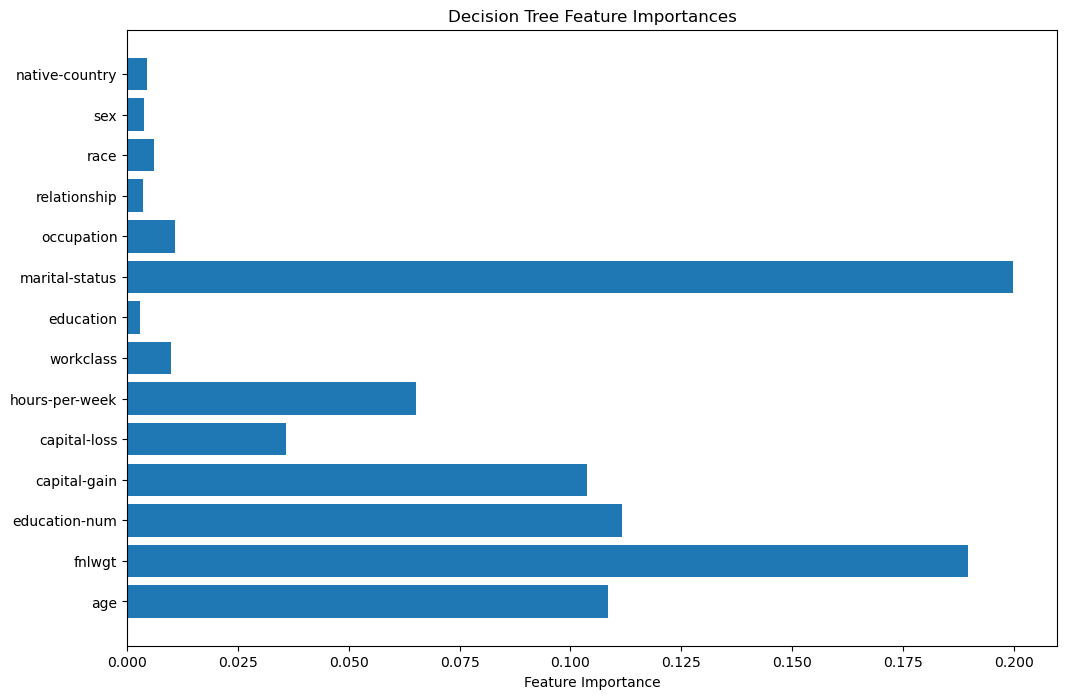

In [7]:
import matplotlib.pyplot as plt

# Feature importances from the Decision Tree
feature_importances = decision_tree_model.feature_importances_
# Create a bar plot for feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_names_simplified, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

SHAP (SHapley Additive exPlanations)
SHAP explains the output of any model by computing the contribution of each feature. It is based on game theory and provides a more global perspective compared to LIME.

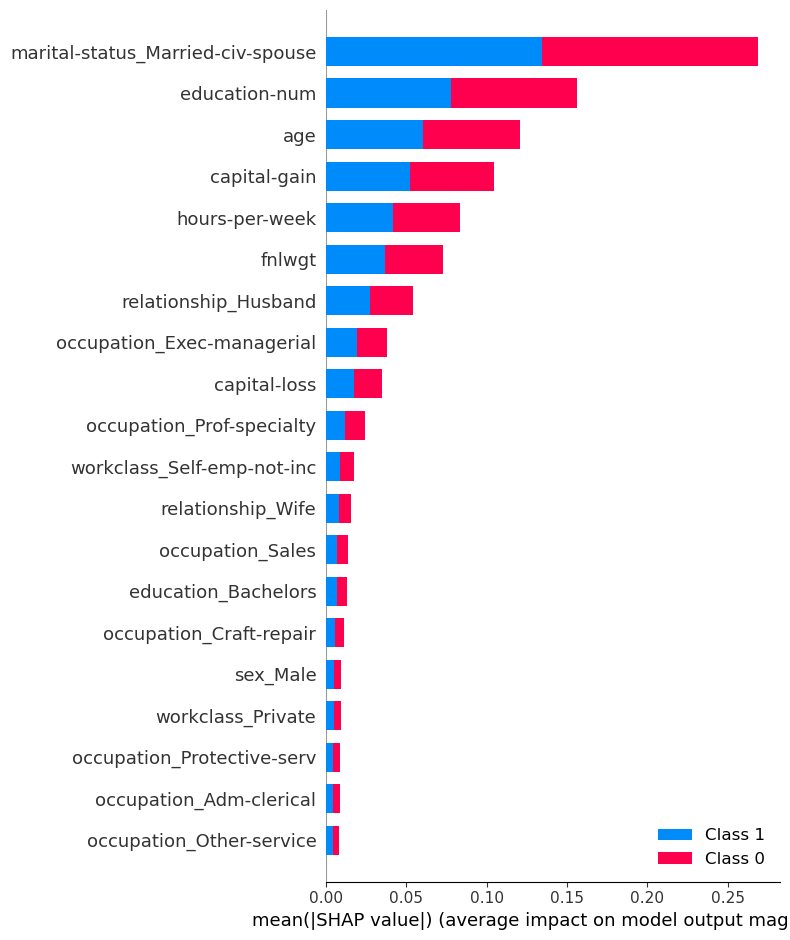

Feature Importances based on SHAP values:


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [8]:
import numpy as np
shap_values = shap.TreeExplainer(decision_tree_model).shap_values(X)
shap.summary_plot(shap_values, X)


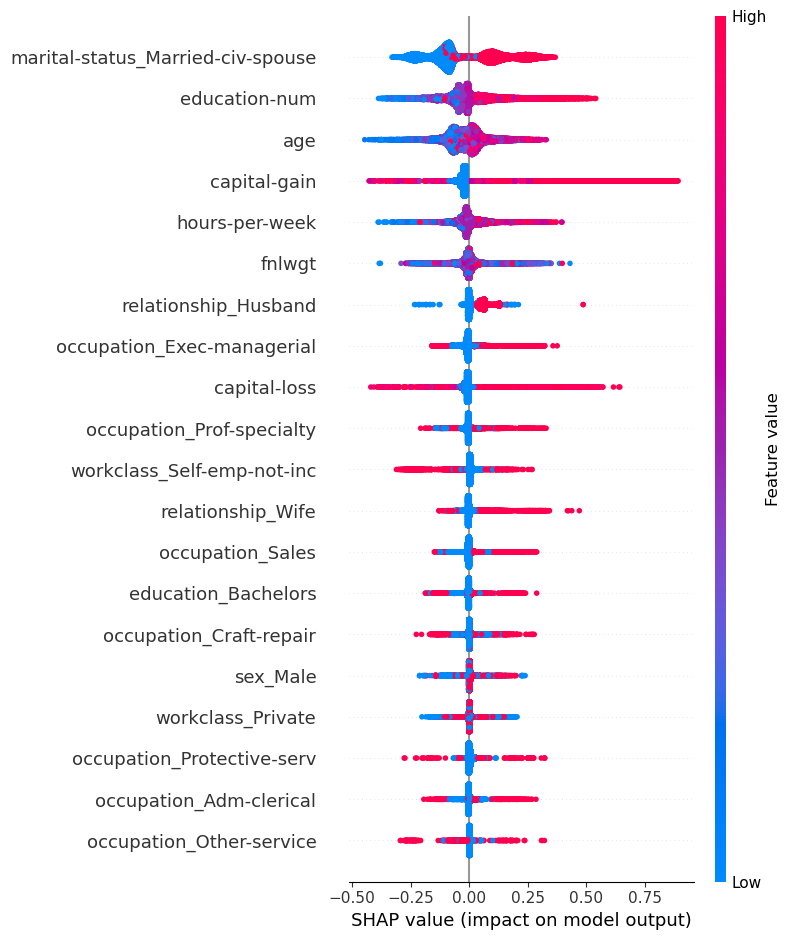

Feature Importances based on SHAP values for class 1:
marital-status_Married-civ-spouse: Mean SHAP value = 0.1345
education-num: Mean SHAP value = 0.0779
age: Mean SHAP value = 0.0603
capital-gain: Mean SHAP value = 0.0524
hours-per-week: Mean SHAP value = 0.0417
fnlwgt: Mean SHAP value = 0.0365
relationship_Husband: Mean SHAP value = 0.0271
occupation_Exec-managerial: Mean SHAP value = 0.0190
capital-loss: Mean SHAP value = 0.0175
occupation_Prof-specialty: Mean SHAP value = 0.0120
workclass_Self-emp-not-inc: Mean SHAP value = 0.0087
relationship_Wife: Mean SHAP value = 0.0077
occupation_Sales: Mean SHAP value = 0.0068
education_Bachelors: Mean SHAP value = 0.0066
occupation_Craft-repair: Mean SHAP value = 0.0056
sex_Male: Mean SHAP value = 0.0048
workclass_Private: Mean SHAP value = 0.0047
occupation_Protective-serv: Mean SHAP value = 0.0042
occupation_Adm-clerical: Mean SHAP value = 0.0042
occupation_Other-service: Mean SHAP value = 0.0040
sex_Female: Mean SHAP value = 0.0037
relati

In [10]:
# Generate the SHAP summary plot for class of interest (e.g., class 1 in binary classification)
shap.summary_plot(shap_values[1], X)  # Change 1 to 0 if you want to look at the other class

# Calculate mean absolute SHAP values for each feature for the class of interest
mean_shap_values = np.abs(shap_values[1]).mean(axis=0)  # Change 1 to 0 for the other class

# Sort features by their mean absolute SHAP value
sorted_features = np.argsort(mean_shap_values)[::-1]

# Print textual interpretations
print("Feature Importances based on SHAP values for class 1:")
for i in sorted_features:
    print(f"{X.columns[i]}: Mean SHAP value = {mean_shap_values[i]:.4f}")

# Additional textual interpretation
print("\nInterpreting the Results:")
print(f"The most important feature for class 1 based on SHAP values is {X.columns[sorted_features[0]]} with a mean absolute SHAP value of {mean_shap_values[sorted_features[0]]:.4f}.")
print("Features higher up in this list have a greater impact on the model's predictions for class 1. Features with higher mean absolute SHAP values have a more significant influence on the model's output for this class.")

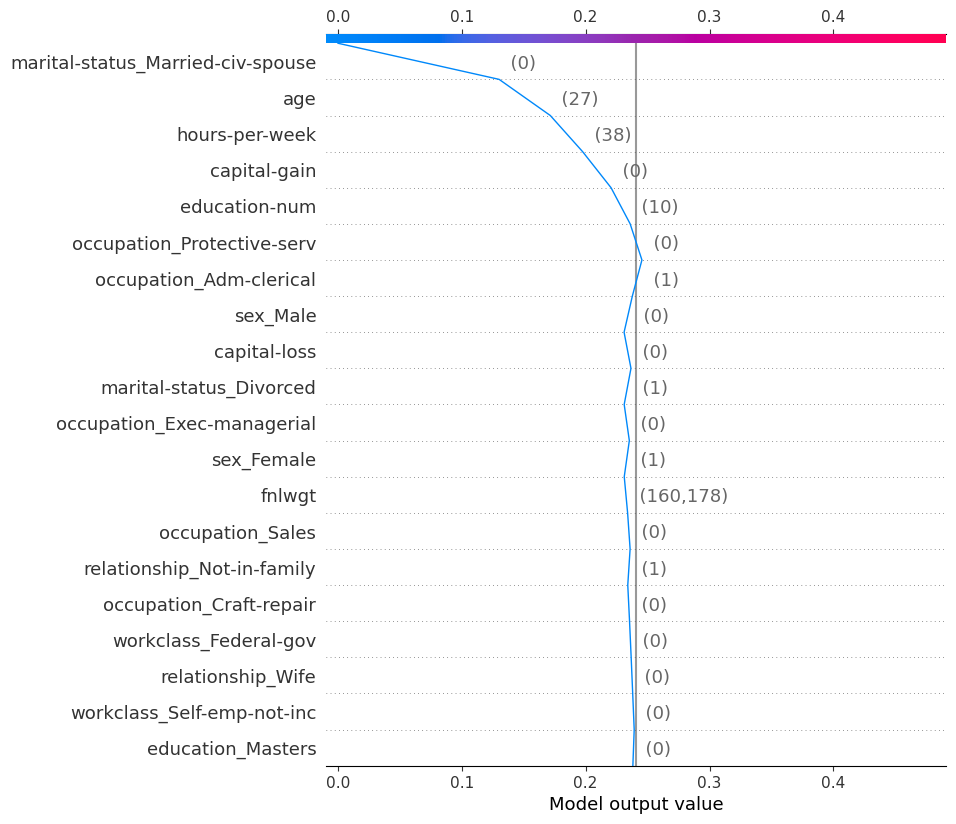

In [52]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(decision_tree_model)

# Choose a specific instance from the test set for explanation
instance_index = 0  # You can change this index to explain a different instance
instance = X_test.iloc[instance_index]

# Calculate SHAP values for the selected instance
shap_values = explainer.shap_values(instance)

# Plot SHAP values using a waterfall plot for the selected instance
shap.initjs()  # Required for Jupyter notebooks if used
# Plot SHAP values using a decision plot for the selected instance
shap.decision_plot(explainer.expected_value[1], shap_values[1], instance)



In [53]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(decision_tree_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Choose a specific instance from the test set for explanation
instance_index = 0  # Adjust this index as needed

# Corrected SHAP force plot for a single instance
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],  # Expected value for the class
    shap_values[1][instance_index],  # SHAP values for the selected instance
    X_test.iloc[instance_index]  # Feature values for the selected instance
)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Adult Income dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
income_data = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)


In [13]:
income_data = income_data.dropna()
income_data_encoded = pd.get_dummies(income_data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
X = income_data_encoded.drop('income', axis=1)
y = income_data_encoded['income']



In [16]:
# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, 
    feature_names=X_train.columns, 
    class_names=['<=50K', '>50K'],  # Adjust these class names based on your actual classes
    discretize_continuous=True
)


In [20]:
# Choose a random instance from the test set
i = np.random.randint(0, X_test.shape[0])


In [21]:
# Explain the prediction for that instance
# Pass the data row as a Series to retain the column names
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],  # Pass as a Series, not as .values
    predict_fn=lambda x: decision_tree_model.predict_proba(pd.DataFrame(x, columns=X_test.columns)),  # Wrap in a lambda function
    num_features=10
)

Feature Names: ['capital-gain <= 0.00', 'native-country_Poland <= 0.00', 'native-country_Hong <= 0.00', 'education_Preschool <= 0.00', 'native-country_Guatemala <= 0.00', 'native-country_Ireland <= 0.00', 'native-country_Nicaragua <= 0.00', 'native-country_Portugal <= 0.00', 'native-country_France <= 0.00', 'native-country_Scotland <= 0.00']
Weights: [-0.4817176518811231, 0.3280648148846505, 0.2812235627400507, 0.27962517534951975, 0.27484923848069176, 0.2691901702545202, -0.2369858830239358, -0.22883673028575466, 0.16714632926176276, 0.10962007190418131]


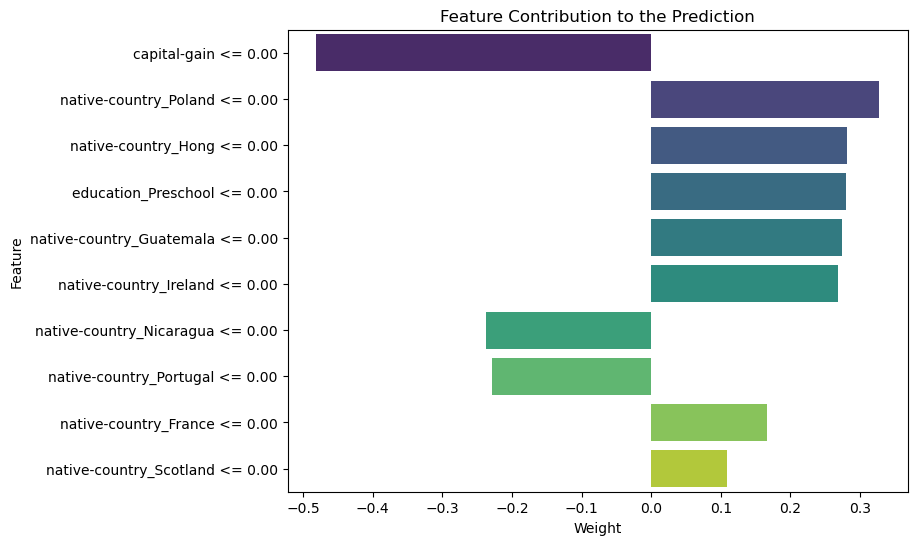

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting feature names and weights from LIME explanation
feature_names, weights = zip(*exp.as_list())

# Convert to list if not already
feature_names = list(feature_names)
weights = list(weights)

# Verify the data format
print("Feature Names:", feature_names)
print("Weights:", weights)

# Creating a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=weights, y=feature_names, palette='viridis')
plt.title('Feature Contribution to the Prediction')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()

# Apply Post-Hoc Explanations

This used to visualize and summarize the overall impact of each feature on the model's predictions across the dataset. This aids in understanding the global behavior of the model and which features contribute most to its decisions.

In [13]:
# Apply SHAP for global explanations
shap_values = shap.TreeExplainer(decision_tree_model).shap_values(X)
shap.summary_plot(shap_values, X)


NameError: name 'np' is not defined

# Compare Models and Explanations

In [ ]:
# Train a more complex model (e.g., Random Forest)
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Apply SHAP for global explanations on Random Forest
shap_values_rf = shap.TreeExplainer(random_forest_model).shap_values(X)
shap.summary_plot(shap_values_rf, X)

# Compare the interpretability of the two models and their explanations
# Add LIME and other techniques for local explanations
# Example: Apply LIME for local explanations on Random Forest
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train.values, mode='classification')
lime_explanation_rf = explainer.explain_instance(X_test.values[0], random_forest_model.predict_proba)
lime_explanation_rf.show_in_notebook()

NameError: name 'X_train' is not defined

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap
from lime import lime_tabular
import matplotlib.pyplot as plt
from pdpbox import pdp,  info_plots

In [ ]:

# Load the Adult Income dataset (replace 'path_to_data' with your actual path)
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(data_url, header=None, names=columns, na_values=' ?', skipinitialspace=True)
data.describe()
data
# Preprocess the data
data = data.dropna()
data_encoded = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Evaluate the Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Simplify feature names for visualization
feature_names_simplified = [col.split('_')[0] if '_' in col else col for col in X.columns]


Decision Tree Accuracy: 0.82081989866421


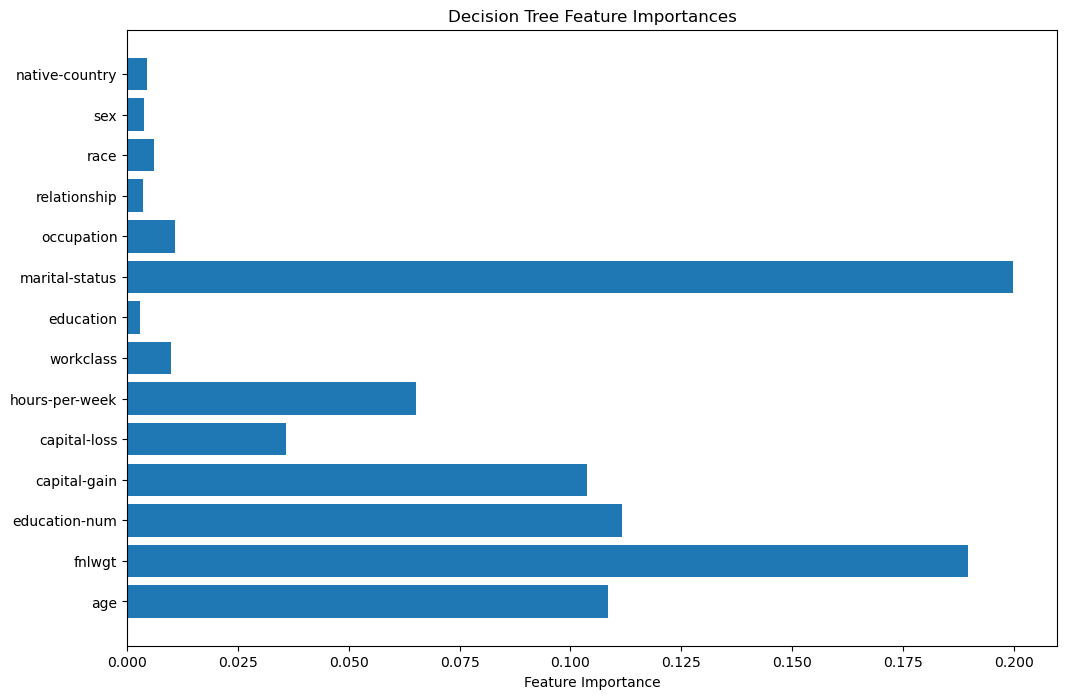

In [ ]:
# Feature importances from the Decision Tree
feature_importances = decision_tree_model.feature_importances_
# Create a bar plot for feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_names_simplified, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

In [ ]:
from pdpbox import pdp

# Assuming decision_tree_model is your trained Decision Tree model
# Replace feature_of_interest with the feature you want to plot
feature_of_interest = 'age'

# Create PDPs for the specified feature
pdp_goals = pdp.pdp_isolate(model=decision_tree_model, dataset=X_test, model_features=feature_names_simplified, feature=feature_of_interest)

# Plot the PDP
pdp.pdp_plot(pdp_goals, feature_of_interest)
plt.show()


AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

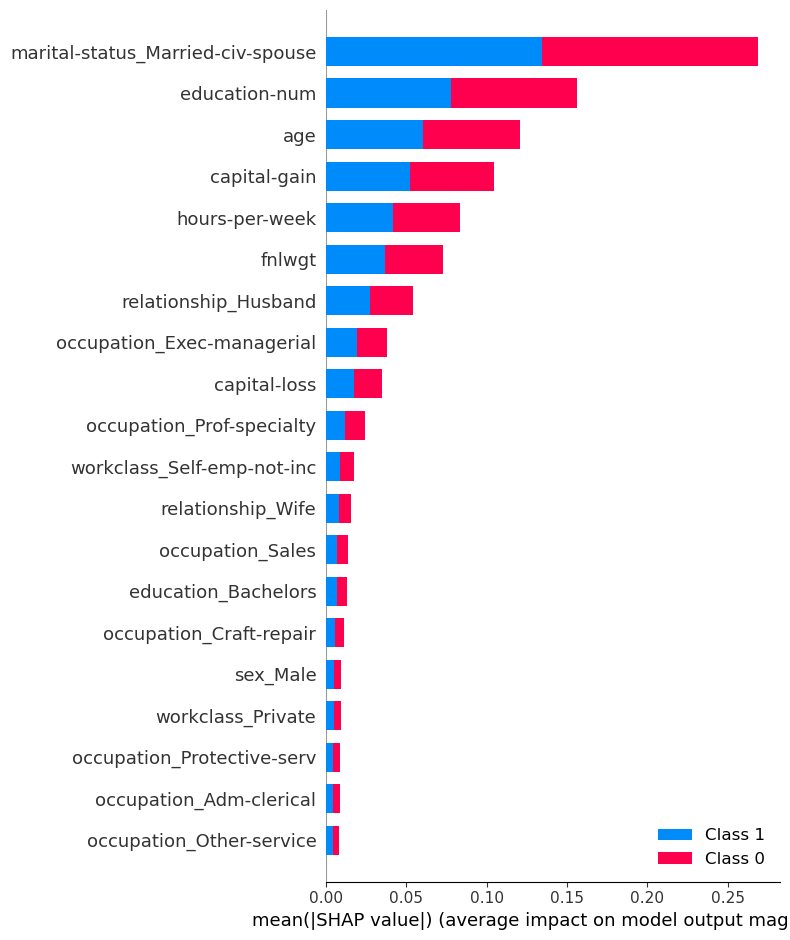

In [ ]:
# Apply SHAP for global explanations
shap_values = shap.TreeExplainer(decision_tree_model).shap_values(X)
shap.summary_plot(shap_values, X)

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(X_train.values, mode='classification', feature_names=feature_names_simplified, class_names=['<=50K', '>50K'])
lime_explanation_dt = explainer.explain_instance(X_test.values[1], decision_tree_model.predict_proba, num_samples=5000)

# Plot the local explanation
lime_explanation_dt.show_in_notebook()



X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [ ]:
# Train a more complex model (Random Forest)
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# Evaluate the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8592046675879011


In [ ]:
import shap
# Apply SHAP for global explanations on Random Forest
shap_values_rf = shap.TreeExplainer(random_forest_model).shap_values(X)

# Generate bar charts for SHAP values on Random Forest
shap.summary_plot(shap_values_rf[1], X, feature_names=feature_names_simplified, class_names=['<=50K', '>50K'], plot_type='bar')


NameError: name 'random_forest_model' is not defined

In [ ]:
# Apply LIME for local explanations on Random Forest
lime_explanation_rf = explainer.explain_instance(X_test.values[0], random_forest_model.predict_proba)

# Plot the local explanation for Random Forest
lime_explanation_rf.as_pyplot_figure()

NameError: name 'explainer' is not defined

***


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import shap
from lime import lime_tabular
from sklearn.preprocessing import LabelEncoder

# Load Adult Income dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
income_data = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

# Preprocess the dataset
income_data = income_data.dropna()
income_data_encoded = pd.get_dummies(income_data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
X = income_data_encoded.drop('income', axis=1)
y = income_data_encoded['income']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluate the Decision Tree model
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.82081989866421


In [ ]:
# LIME for local explanations
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns.tolist(), class_names=['<=50K', '>50K'], discretize_continuous=True)


In [ ]:
# Choose an instance for explanation (you can change the index)
instance_to_explain = X_test.iloc[0]
explanation = explainer.explain_instance(instance_to_explain.values, decision_tree_model.predict_proba)

# Display the explanation
explanation.show_in_notebook(show_table=True, show_all=False)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [ ]:
import pandas as pd

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(data_url, header=None, names=columns, na_values=' ?', skipinitialspace=True)
data.describe()
data

# Display the first few rows to understand the data
print(data.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features and target
X = data.drop('income', axis=1)  # assuming 'income' is the target variable
y = data['income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # fewer trees
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
import shap
# Create the SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_train.iloc[0])

In [ ]:
import lime
import lime.lime_tabular

# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['<=50K', '>50K'], discretize_continuous=True)

# Explain a single prediction
i = 20  # index of the instance to explain
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


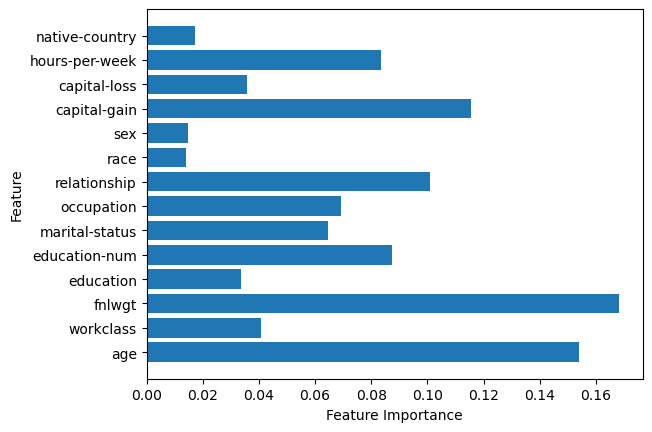

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Plot feature importances
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming you have a DataFrame 'df'

X = df.drop('income', axis=1)  # Replace 'income' with the name of your target column
y = df['income']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# If you want to use LIME or SHAP for explanations, you can do so in a similar way as with the RandomForestClassifier


NameError: name 'df' is not defined